In [12]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from PIL import Image
import pandas as pd
import numpy as np
import os
import pickle
import re
import tensorflow as tf
import tensorflow.python.platform
from tensorflow.python.platform import gfile
from skimage.io import imread
import matplotlib.pyplot as plt

In [3]:
def create_graph():
    with gfile.FastGFile('inception-2015-12-05/classify_image_graph_def.pb', 'rb') as f:
        graph_def = tf.GraphDef()
        graph_def.ParseFromString(f.read())
    _ = tf.import_graph_def(graph_def, name='')

def extract_features(image): #image is the path of image
    create_graph() #necessary for getting tensors

    with tf.Session() as sess:
        next_to_last_tensor = sess.graph.get_tensor_by_name('pool_3:0')

        image_data = gfile.FastGFile(image, 'rb').read()

        predictions = sess.run(next_to_last_tensor, {'DecodeJpeg/contents:0': image_data})
        return np.squeeze(predictions)

In [ ]:
# extract features of all the images
patient_ids = []
dates = []
feature_vects = []
for directory, subdirectories, files in os.walk("../legs_folder_jpg_cnn_Qingjie"):# put here the path of train set
    for file in files:
        path = os.path.join(directory, file)
        if path.endswith(".jpg"):
            patient_ids.append(directory.split("/")[1] + "/" + file.split(".")[0])
            feature_vects.append(extract_features(path))
            
df = pd.DataFrame(feature_vects, index=patient_ids)
pickle.dump(df, open("inception_cnn_features2.pkl", "wb") ) #save the extracted featuers

In [4]:
#read the extracted features
extracted_features = pd.read_pickle("inception_cnn_features_Qingjie_Johnathan.pkl")

In [5]:
extracted_features

,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
legs_folder_jpg_cnn_Qingjie/11HS_OCMR-gen,0.164151,0.018411,0.860192,0.235207,0.093055,0.857333,0.057959,0.224224,0.181330,0.145060,...,0.407469,0.217232,0.208409,1.007517,0.549417,1.123846,0.627464,0.068723,0.000000,0.130673
legs_folder_jpg_cnn_Qingjie/13BL_OCMR-gen,0.264231,0.010349,1.183429,0.015844,0.172795,0.295182,0.256690,0.372902,0.122112,0.353640,...,0.345351,0.483148,0.338158,1.189270,0.051534,1.149649,0.345775,0.287226,0.046311,0.163727
legs_folder_jpg_cnn_Qingjie/14MM_OCMR-,0.246674,0.257380,0.614632,0.015388,0.083560,0.308084,0.022644,0.271424,0.161799,0.179750,...,0.251756,0.590695,0.391394,0.860033,0.325213,0.924889,0.214520,0.233471,0.063212,0.642810
legs_folder_jpg_cnn_Qingjie/15BO_OCMR-,0.169998,0.029488,0.876539,0.047435,0.473674,0.258197,0.310078,0.268706,0.347238,0.137824,...,0.119462,0.488553,0.019853,0.378139,0.120675,1.262191,0.427092,0.697115,0.065668,0.483208
legs_folder_jpg_cnn_Qingjie/16FN_OCMR+,0.334635,0.126451,0.638219,0.018540,0.211393,0.043663,0.255389,0.339354,0.231006,0.283722,...,0.035079,0.101709,0.002696,0.401884,0.035186,0.611416,0.580034,0.676400,0.011819,0.446534
legs_folder_jpg_cnn_Qingjie/17BL_OCMR-gen,0.387841,0.082769,0.891788,0.175100,0.116912,1.100558,0.079015,0.410514,0.104119,0.347073,...,0.394082,0.205385,0.572124,0.329216,0.149632,0.356867,1.017276,0.154578,0.003078,0.301006
legs_folder_jpg_cnn_Qingjie/18MB_OCMR-gen,0.239088,0.167128,0.687956,0.200467,0.064719,0.436957,0.123841,0.251840,0.238598,0.138118,...,0.356292,0.109051,0.358572,0.802959,0.251931,0.926233,0.489320,0.419271,0.000995,0.743945
legs_folder_jpg_cnn_Qingjie/19KW_OCMR-,0.300608,0.127357,0.449541,0.076230,0.100339,0.481320,0.252689,0.245453,0.227858,0.217089,...,0.380570,0.475128,0.457111,0.578536,0.138764,0.706862,0.376726,0.754043,0.034540,0.635976
legs_folder_jpg_cnn_Qingjie/20AJ_OCMR+,0.405670,0.277470,0.346672,0.076771,0.133383,0.514172,0.057590,0.247426,0.269021,0.289391,...,0.120643,0.510688,0.019432,0.704541,0.113509,0.711275,0.107651,0.236153,0.209553,0.566149
legs_folder_jpg_cnn_Qingjie/21LLLY_OCMR-,0.344691,0.148803,0.588681,0.137600,0.117326,0.099350,0.268590,0.150073,0.356997,0.234103,...,0.126279,0.528925,0.062527,0.551940,0.120912,0.735661,0.384907,0.784353,0.018699,0.810304


In [6]:
# prepare the features and the labels
X=extracted_features.values
labels=[]
for i in range(48):
    labels.append(1 if extracted_features.index[i][-1]=='+' else 0)
labels=np.array(labels)

In [7]:
X.shape

(48, 2048)

In [8]:
labels.shape

(48,)

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [45]:
#Scale data
scaler = StandardScaler()
scaler.fit(X)
X=scaler.transform(X)

#Create training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.25, random_state=42,stratify=labels)


In [54]:
# X_train=X[:40,:]
# X_test=X[40:,:]
# y_train=labels[:40]
# y_test=labels[40:]
# #Scale data
# scaler = StandardScaler()
# scaler.fit(X_train)
# X_train=scaler.transform(X_train)
# scaler.fit(X_test)
# X_test=scaler.transform(X_test)

# MLP

In [30]:
import sklearn  
import tensorflow as tf

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Input
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, BatchNormalization


In [31]:
Y_cat_train = tf.keras.utils.to_categorical(y_train)  
Y_cat_test = tf.keras.utils.to_categorical(y_test)  


In [39]:
# plot function for plotting training and test accuracy and loss of each epoch
def plot_history(history):
  print(history.history.keys())

  # summarize history for loss
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

  # summarize history for accuracy
  plt.plot(history.history['acc'])
  plt.plot(history.history['val_acc'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

Train on 36 samples, validate on 12 samples
Epoch 1/50
36/36 [==============================] - 2s 61ms/sample - loss: 1.1450 - acc: 0.7500 - val_loss: 1.4935 - val_acc: 0.6667
Epoch 2/50
36/36 [==============================] - 0s 6ms/sample - loss: 0.5709 - acc: 0.9167 - val_loss: 1.8612 - val_acc: 0.5833
Epoch 3/50
36/36 [==============================] - 0s 5ms/sample - loss: 0.7645 - acc: 0.8889 - val_loss: 2.0516 - val_acc: 0.6667
Epoch 4/50
36/36 [==============================] - 0s 6ms/sample - loss: 1.2623 - acc: 0.7500 - val_loss: 4.6609 - val_acc: 0.5833
Epoch 5/50
36/36 [==============================] - 0s 4ms/sample - loss: 0.4572 - acc: 0.8889 - val_loss: 6.7535 - val_acc: 0.5833
Epoch 6/50
36/36 [==============================] - 0s 4ms/sample - loss: 0.4947 - acc: 0.9167 - val_loss: 7.0728 - val_acc: 0.6667
Epoch 7/50
36/36 [==============================] - 0s 6ms/sample - loss: 0.3157 - acc: 0.9167 - val_loss: 7.3648 - val_acc: 0.6667
Epoch 8/50
36/36 [=============

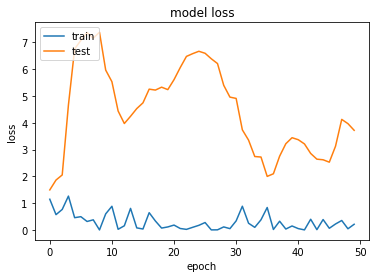

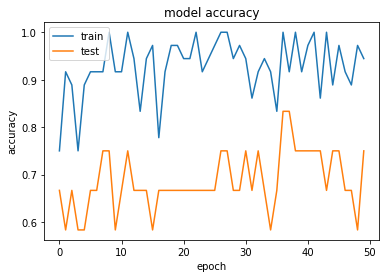

In [42]:

model_mlp_multi_layer_BN = Sequential([
  BatchNormalization(input_shape=(2048,)),
  Dense(1024,activation='relu'),
  BatchNormalization(),
  Dense(1024,activation='relu'),
  BatchNormalization(),
  Dense(1024,activation='relu'),
  BatchNormalization(),
  Dense(2,activation='softmax')
])

# create the loss and optimiser, use 'categorical_crossentropy' in loss
model_mlp_multi_layer_BN.compile(loss="categorical_crossentropy", optimizer="adam",metrics=["accuracy"]) # TO FILL IN

# Run optimisation algorithm
n_epochs = 50
batch_size = 8


history=model_mlp_multi_layer_BN.fit(X_train, Y_cat_train, epochs=n_epochs,batch_size=batch_size,validation_data=(X_test, Y_cat_test)) # TO FILL IN

plot_history(history)

# SVM

In [15]:
from time import time
from sklearn.model_selection import  cross_val_score
# The two discriminant methods below support multiclass
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


In [46]:
# Linear Discriminant Analysis
print("Fitting LDA")
t0 = time()
lda = LinearDiscriminantAnalysis()
lda_score = cross_val_score(lda,X=X_train, y=y_train,cv=5)
print("done in %0.3fs" % (time() - t0))
print(" Average and std CV score : {0} +- {1}".format(lda_score.mean(), lda_score.std() ))

# Quadratic Discriminant Analysis
print("Fitting QDA")
t0 = time()
qda = QuadraticDiscriminantAnalysis()
qda_score = cross_val_score(qda,X=X_train, y=y_train,cv=5)
print("done in %0.3fs" % (time() - t0))
print(" Average and std CV score : {0} +- {1}".format(qda_score.mean(), qda_score.std() ))


Fitting LDA
done in 0.061s
 Average and std CV score : 0.775 +- 0.07264831572567791
Fitting QDA
done in 0.038s
 Average and std CV score : 0.6166666666666667 +- 0.12190615698606495


In [55]:
lda.fit(X_train,y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [57]:
#save the lda
f = open('sample_svm.pickle', 'wb')
pickle.dump(lda, f)
f.close()

In [48]:
lda.predict(X_test)

array([0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1])

In [49]:
y_test

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1])

In [50]:
lda.score(X_test,y_test)

0.5833333333333334

In [51]:
lda.predict_proba(X_test)

array([[0.81129125, 0.18870875],
       [0.96495103, 0.03504897],
       [0.39681132, 0.60318868],
       [0.4542872 , 0.5457128 ],
       [0.24805768, 0.75194232],
       [0.49360437, 0.50639563],
       [0.58002774, 0.41997226],
       [0.82714185, 0.17285815],
       [0.10037859, 0.89962141],
       [0.78575478, 0.21424522],
       [0.26406914, 0.73593086],
       [0.1367634 , 0.8632366 ]])

When the probability is greater than 80%, the accuracy is almost 100%. We can set a threshold of probability and classify the image in three categories: with lesions, without lesions and uncertain.

In [52]:
index=[] #index of images with certain results (with/without lesions) 
predict_prob=lda.predict_proba(X_test)
for i in range(y_test.shape[0]):
    if predict_prob[i,0]>0.8 or predict_prob[i,0]<0.2:
        index.append(i)
index

[0, 1, 7, 8, 11]

In [53]:
lda.score(X_test[index],y_test[index])

1.0

# Trees

In [57]:
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier


## Decision Trees

In [58]:
Tree = DecisionTreeClassifier(random_state=0)
p_grid_tree = {'min_samples_split':range(2,10),'min_samples_leaf':range(2,10)} 
grid_tree1 = GridSearchCV(Tree,p_grid_tree,cv=5)
grid_tree1.fit(X_train,y_train)
print("Best Validation Score: {}".format(grid_tree1.best_score_))
print("Best params: {}".format(grid_tree1.best_params_))
print("Tree test score :",grid_tree1.score(X_test,y_test))

Best Validation Score: 0.6388888888888888
Best params: {'min_samples_leaf': 2, 'min_samples_split': 2}
Tree test score : 0.75


## Bagging

In [59]:
best_params=grid_tree1.best_params_
Tree = DecisionTreeClassifier(min_samples_leaf=best_params["min_samples_leaf"],min_samples_split=best_params["min_samples_split"], random_state=0)

p_grid_bagging = {'n_estimators': [5,10,15,20]}      
bag=BaggingClassifier(base_estimator=Tree, random_state=0)
grid_bagging = GridSearchCV(estimator=bag,param_grid=p_grid_bagging,cv=5)
grid_bagging.fit(X_train,y_train)
print("Best Validation Score: {}".format(grid_bagging.best_score_))
print("Best params: {}".format(grid_bagging.best_params_))
print("Bagging test score :",grid_bagging.score(X_test,y_test))

Best Validation Score: 0.75
Best params: {'n_estimators': 15}
Bagging test score : 0.5833333333333334


## Random Forest

In [60]:
RF=RandomForestClassifier(random_state=0)
p_grid_RF = {'n_estimators': [10,15,20,25,30], 'min_samples_leaf': [2,3,4,5,6], 'max_features': ['sqrt','log2']}   

grid_RF = GridSearchCV(estimator=RF, param_grid=p_grid_RF, scoring='accuracy', cv=5)
grid_RF.fit(X_train,y_train)

print("Best Validation Score: {}".format(grid_RF.best_score_))
print("Best params: {}".format(grid_RF.best_params_))
print("Random Forest test score :",grid_RF.score(X_test,y_test))

Best Validation Score: 0.75
Best params: {'max_features': 'sqrt', 'min_samples_leaf': 6, 'n_estimators': 30}
Random Forest test score : 0.5
